In [3]:
import sklearn
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

In [80]:
def generate_data(miu, sigma, num):
    """
    生成测试数据
    :param miu: 期望
    :param sigma: 标准差
    :param num: 数据个数
    :return:
    """
    points_x = np.random.randn(num) * sigma + miu
    points_y = np.random.randn(num) * sigma + miu
    after = np.vstack((points_x, points_y))
    return after.transpose()

def draw(x, y):
    plt.scatter(x, y, edgecolors='red')
    plt.show()

def draw_pred(x, y, classification_id, **kwargs):
    colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'pink']
    for i in range(len(classification_id)):
        plt.scatter(x[i],  y[i], c=colors[classification_id[i]], s=50)
    plt.show()



def cg_axis_bias(array: np.ndarray, bias: int, axis: str):
    """
    聚合点整体位移
    :param bias:
    :param array:
    :param axis:
    :return:
    """
    if axis == 'x':
        array[:, 0] += bias
    if axis == 'y':
        array[:, 1] += bias
    else:
        raise TypeError("parameter <axis> must be `x` or `y`!")
    return array

In [86]:
class1 = generate_data(0, 5, 10)
class2 = generate_data(10, 5, 30)
class3 = generate_data(5, 5, 20)
class3 = cg_axis_bias(class3, 20, 'y')
combine = np.concatenate([class1, class2, class3], axis=0)
combine

array([[ -3.6886638 ,   0.24006796],
       [ 13.71406904,  -6.69072974],
       [  1.19799289,  -2.01901943],
       [ -2.29778481, -10.39167956],
       [  2.68383348,  -7.87693524],
       [ -9.49886443,  -2.19443062],
       [ -0.37106925,   1.91725018],
       [ -0.24517439,   4.58434042],
       [  0.6174644 ,  -0.76584297],
       [  1.88535244,   5.01326422],
       [  5.32005401,   9.96667231],
       [ 24.21011172,   5.88987966],
       [ 20.88066834,  12.38454408],
       [ 15.99190066,   8.80213671],
       [ 13.07075271,  13.5468176 ],
       [ 11.15219329,  11.75433243],
       [ 10.14347284,   7.88637749],
       [ -1.66512471,  11.44180768],
       [  7.5992949 ,  17.27905853],
       [ 12.35039931,   4.67794935],
       [  2.44515455,  12.35578086],
       [  6.28731643,  11.17321137],
       [ 11.29352748,  15.84344177],
       [ 17.37653032,  12.52759458],
       [ 11.66605912,   9.68703112],
       [  9.65884877,   7.96069376],
       [  4.2346426 ,  22.05501211],
 

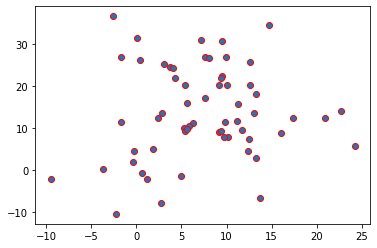

In [87]:
# k_means = KMeans(2).fit(combine)
x = combine[:, 0]
y = combine[:, 1]
draw(x, y)

In [88]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, verbose=True).fit(X=combine)

Initialization complete
Iteration 0, inertia 3751.6791576457017
Iteration 1, inertia 3044.7712069031213
Iteration 2, inertia 2843.9277946901925
Iteration 3, inertia 2808.0156722999996
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3327.6257863020865
Iteration 1, inertia 2852.18875853148
Iteration 2, inertia 2820.661307893652
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3709.0731668759854
Iteration 1, inertia 2992.7132100501667
Iteration 2, inertia 2827.414503279858
Iteration 3, inertia 2820.661307893652
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4009.0185791633153
Iteration 1, inertia 2820.661307893652
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4370.8622097453535
Iteration 1, inertia 3538.784214345014
Iteration 2, inertia 3346.966938347377
Iteration 3, inertia 3214.494228498713
Iteration 4, inertia 3121

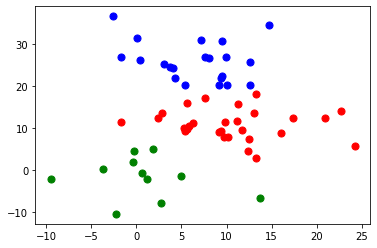

In [89]:
classes = kmeans.predict(X=combine)
draw_pred(x, y, classes)